# ANALIZA PODATAKA

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from termcolor import colored
from sklearn.tree import DecisionTreeClassifier, plot_tree
from scipy.io import arff
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

data2 = arff.loadarff('speeddating.arff')
train2= pd.DataFrame(data2[0])
catCols = [col for col in train2.columns if train2[col].dtype=="O"]
train2[catCols]=train2[catCols].apply(lambda x: x.str.decode('utf8'))
train2.to_csv('./podaci.csv',index=False)





Analiza podataka

In [3]:
#Ucitavanje podataka:
data = pd.read_csv('./podaci.csv')
data.drop('has_null',axis=1,inplace= True)
print(data.shape)


(8378, 122)


In [4]:
data.head()


,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,importance_same_race,...,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
0,1.0,female,21.0,27.0,6.0,[4-6],Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2.0,...,[0-3],[3-5],7.0,6.0,[6-8],[5-6],0.0,1,0,0
1,1.0,female,21.0,22.0,1.0,[0-1],Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2.0,...,[0-3],[3-5],7.0,5.0,[6-8],[5-6],1.0,1,0,0
2,1.0,female,21.0,22.0,1.0,[0-1],Asian/Pacific Islander/Asian-American,Asian/Pacific Islander/Asian-American,1,2.0,...,[0-3],[3-5],7.0,NaN,[6-8],[0-4],1.0,1,1,1
3,1.0,female,21.0,23.0,2.0,[2-3],Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2.0,...,[0-3],[3-5],7.0,6.0,[6-8],[5-6],0.0,1,1,1
4,1.0,female,21.0,24.0,3.0,[2-3],Asian/Pacific Islander/Asian-American,Latino/Hispanic American,0,2.0,...,[0-3],[3-5],6.0,6.0,[6-8],[5-6],0.0,1,1,1


Vidimo da imamo 122 atributa, od cega su 121 za predvidjanje, a poslednji atrbut 'match' nam je ciljni atribut

In [5]:
data.columns

Index(['wave', 'gender', 'age', 'age_o', 'd_age', 'd_d_age', 'race', 'race_o',
       'samerace', 'importance_same_race',
       ...
       'd_expected_num_interested_in_me', 'd_expected_num_matches', 'like',
       'guess_prob_liked', 'd_like', 'd_guess_prob_liked', 'met', 'decision',
       'decision_o', 'match'],
      dtype='object', length=122)

Provera nedostajucih vrednosti:

In [6]:
data.isna()

,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,importance_same_race,...,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8374,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8375,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8376,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Posto je ovako nepregledno, proveravamo da li u svakoj koloni neka nedostajuca vrednost:

In [7]:
data.isna().any()

wave                  False
gender                False
age                    True
age_o                  True
d_age                 False
                      ...  
d_guess_prob_liked    False
met                    True
decision              False
decision_o            False
match                 False
Length: 122, dtype: bool

In [8]:
data.isna().any().any()

True

Na osnovu ovoga zakljucemo da postoje nedostajuce vrednosti Prva ideja  mi je bila da obrisem sve redove u kojima se javlaju nedostajuce vrednosti, medjutim, tih redova ima 7330, pa to ne mogu da uradim. Ideja mi je da zamenimo sve vrednosti brojevima i da onda NaN vrednosti zamenim prosekom. Dodatno, moramo sve atribute koji nisu brojevi da zamenimo brojevima.

In [9]:

data['gender'] = data['gender'].replace("female",0)
data['gender'] = data['gender'].replace("male",1)



data['age'] = data['age'].replace(np.nan,data['age'].mean())


data['age_o'] = data['age_o'].replace(np.nan,int(data['age_o'].mean()))
data['importance_same_race'] = data['importance_same_race'].replace(np.nan,int(data['importance_same_race'].mean()))
data['importance_same_religion'] = data['importance_same_religion'].replace(np.nan,int(data['importance_same_religion'].mean()))



data['race'] = data['race'].replace("Asian/Pacific Islander/Asian-American",0)
data['race'] = data['race'].replace("European/Caucasian-American",1)
data['race'] = data['race'].replace('Other',2)
data['race'] = data['race'].replace("Latino/Hispanic American",3)
data['race'] = data['race'].replace("Black/African American",4)
data['race'] = data['race'].replace('?',np.nan)
data['race'] =data['race'].replace(np.nan,int(data['race'].mean()))

data['race_o'] = data['race_o'].replace("Asian/Pacific Islander/Asian-American",0)
data['race_o'] = data['race_o'].replace("European/Caucasian-American",1)
data['race_o'] = data['race_o'].replace('Other',2)
data['race_o'] = data['race_o'].replace('Latino/Hispanic American',3)
data['race_o'] = data['race_o'].replace('Black/African American',4)
data['race_o'] = data['race_o'].replace('?',np.nan)
data['race_o'] =data['race_o'].replace(np.nan,int(data['race_o'].mean()))


#polje sa profesijom ima mnogo vrednosti, ali mislim da nije bitno za ovaj zadatak, pa preskacem 
data['d_d_age'] = data['d_d_age'].replace('[0-1]',0)
data['d_d_age'] = data['d_d_age'].replace('[2-3]',1)
data['d_d_age'] = data['d_d_age'].replace('[4-6]',2)
data['d_d_age'] = data['d_d_age'].replace('[7-37]',3)

data['d_importance_same_race'] = data['d_importance_same_race'].replace('[0-1]',0)
data['d_importance_same_race'] = data['d_importance_same_race'].replace('[2-5]',1)
data['d_importance_same_race'] = data['d_importance_same_race'].replace('[6-10]',2)


data['d_importance_same_religion'] = data['d_importance_same_religion'].replace('[0-1]',0)
data['d_importance_same_religion'] = data['d_importance_same_religion'].replace('[2-5]',1)
data['d_importance_same_religion'] = data['d_importance_same_religion'].replace('[6-10]',2)


data['pref_o_attractive'] = data['pref_o_attractive'].replace(np.nan,data['pref_o_attractive'].mean()) 
data['pref_o_sincere'] = data['pref_o_sincere'].replace(np.nan,data['pref_o_sincere'].mean()) 
data['pref_o_intelligence'] = data['pref_o_intelligence'].replace(np.nan,data['pref_o_intelligence'].mean()) 
data['pref_o_funny'] = data['pref_o_funny'].replace(np.nan,data['pref_o_funny'].mean()) 
data['pref_o_ambitious'] = data['pref_o_ambitious'].replace(np.nan,data['pref_o_ambitious'].mean()) 
data['pref_o_shared_interests'] = data['pref_o_shared_interests'].replace(np.nan,data['pref_o_shared_interests'].mean()) 

data['d_pref_o_attractive'] = data['d_pref_o_attractive'].replace('[0-15]',0)
data['d_pref_o_attractive'] = data['d_pref_o_attractive'].replace('[16-20]',1)
data['d_pref_o_attractive'] = data['d_pref_o_attractive'].replace('[21-100]',2)

data['d_pref_o_sincere'] = data['d_pref_o_sincere'].replace('[0-15]',0)
data['d_pref_o_sincere'] = data['d_pref_o_sincere'].replace('[16-20]',1)
data['d_pref_o_sincere'] = data['d_pref_o_sincere'].replace('[21-100]',2)


data['d_pref_o_intelligence'] = data['d_pref_o_intelligence'].replace('[0-15]',0)
data['d_pref_o_intelligence'] = data['d_pref_o_intelligence'].replace('[16-20]',1)
data['d_pref_o_intelligence'] = data['d_pref_o_intelligence'].replace('[21-100]',2)


data['d_pref_o_funny'] = data['d_pref_o_funny'].replace('[0-15]',0)
data['d_pref_o_funny'] = data['d_pref_o_funny'].replace('[16-20]',1)
data['d_pref_o_funny'] = data['d_pref_o_funny'].replace('[21-100]',2)

data['d_pref_o_ambitious'] = data['d_pref_o_ambitious'].replace('[0-15]',0)
data['d_pref_o_ambitious'] = data['d_pref_o_ambitious'].replace('[16-20]',1)
data['d_pref_o_ambitious'] = data['d_pref_o_ambitious'].replace('[21-100]',2)

data['d_pref_o_shared_interests'] = data['d_pref_o_shared_interests'].replace('[0-15]',0)
data['d_pref_o_shared_interests'] = data['d_pref_o_shared_interests'].replace('[16-20]',1)
data['d_pref_o_shared_interests'] = data['d_pref_o_shared_interests'].replace('[21-100]',2)

data['attractive_o'] = data['attractive_o'].replace(np.nan,data['attractive_o'].mean()) 
data['sinsere_o'] = data['sinsere_o'].replace(np.nan,data['sinsere_o'].mean())
data['intelligence_o'] = data['intelligence_o'].replace(np.nan,data['intelligence_o'].mean()) 
data['funny_o'] = data['funny_o'].replace(np.nan,data['funny_o'].mean()) 
data['ambitous_o'] = data['ambitous_o'].replace(np.nan,data['ambitous_o'].mean()) 
data['shared_interests_o'] = data['shared_interests_o'].replace(np.nan,data['shared_interests_o'].mean()) 


data['d_attractive_o'] = data['d_attractive_o'].replace('[0-5]',0)
data['d_attractive_o'] = data['d_attractive_o'].replace('[6-8]',1)
data['d_attractive_o'] = data['d_attractive_o'].replace('[9-10]',2)

data['d_sinsere_o'] = data['d_sinsere_o'].replace('[0-5]',0)
data['d_sinsere_o'] = data['d_sinsere_o'].replace('[6-8]',1)
data['d_sinsere_o'] = data['d_sinsere_o'].replace('[9-10]',2)

data['d_intelligence_o'] = data['d_intelligence_o'].replace('[0-5]',0)
data['d_intelligence_o'] = data['d_intelligence_o'].replace('[6-8]',1)
data['d_intelligence_o'] = data['d_intelligence_o'].replace('[9-10]',2)

data['d_funny_o'] = data['d_funny_o'].replace('[0-5]',0)
data['d_funny_o'] = data['d_funny_o'].replace('[6-8]',1)
data['d_funny_o'] = data['d_funny_o'].replace('[9-10]',2)

data['d_ambitous_o'] = data['d_ambitous_o'].replace('[0-5]',0)
data['d_ambitous_o'] = data['d_ambitous_o'].replace('[6-8]',1)
data['d_ambitous_o'] = data['d_ambitous_o'].replace('[9-10]',2)

data['d_shared_interests_o'] = data['d_shared_interests_o'].replace('[0-5]',0)
data['d_shared_interests_o'] = data['d_shared_interests_o'].replace('[6-8]',1)
data['d_shared_interests_o'] = data['d_shared_interests_o'].replace('[9-10]',2)

data['attractive_important'] = data['attractive_important'].replace(np.nan,data['attractive_important'].mean())
data['sincere_important'] = data['sincere_important'].replace(np.nan,data['sincere_important'].mean()) 
data['intellicence_important'] = data['intellicence_important'].replace(np.nan,data['intellicence_important'].mean()) 
data['funny_important'] = data['funny_important'].replace(np.nan,data['funny_important'].mean())
data['ambtition_important'] = data['ambtition_important'].replace(np.nan,data['ambtition_important'].mean())
data['shared_interests_important'] = data['shared_interests_important'].replace(np.nan,data['shared_interests_important'].mean())

data['d_attractive_important'] = data['d_attractive_important'].replace('[0-15]',0)
data['d_attractive_important'] = data['d_attractive_important'].replace('[16-20]',1)
data['d_attractive_important'] = data['d_attractive_important'].replace('[21-100]',2)

data['d_sincere_important'] = data['d_sincere_important'].replace('[0-15]',0)
data['d_sincere_important'] = data['d_sincere_important'].replace('[16-20]',1)
data['d_sincere_important'] = data['d_sincere_important'].replace('[21-100]',2)

data['d_intellicence_important'] = data['d_intellicence_important'].replace('[0-15]',0)
data['d_intellicence_important'] = data['d_intellicence_important'].replace('[16-20]',1)
data['d_intellicence_important'] = data['d_intellicence_important'].replace('[21-100]',2)

data['d_funny_important'] = data['d_funny_important'].replace('[0-15]',0)
data['d_funny_important'] = data['d_funny_important'].replace('[16-20]',1)
data['d_funny_important'] = data['d_funny_important'].replace('[21-100]',2)


data['d_ambtition_important'] = data['d_ambtition_important'].replace('[0-15]',0)
data['d_ambtition_important'] = data['d_ambtition_important'].replace('[16-20]',1)
data['d_ambtition_important'] = data['d_ambtition_important'].replace('[21-100]',2)

data['d_shared_interests_important'] = data['d_shared_interests_important'].replace('[0-15]',0)
data['d_shared_interests_important'] = data['d_shared_interests_important'].replace('[16-20]',1)
data['d_shared_interests_important'] = data['d_shared_interests_important'].replace('[21-100]',2)

data['attractive'] = data['attractive'].replace(np.nan,data['attractive'].mean()) 
data['sincere'] = data['sincere'].replace(np.nan,data['sincere'].mean())
data['intelligence'] = data['intelligence'].replace(np.nan,data['intelligence'].mean()) 
data['funny'] = data['funny'].replace(np.nan,data['funny'].mean()) 
data['ambition'] = data['ambition'].replace(np.nan,data['ambition'].mean()) 

#----------------------------------------
data['d_attractive'] = data['d_attractive'].replace('[0-5]',0)
data['d_attractive'] = data['d_attractive'].replace('[6-8]',1)
data['d_attractive'] = data['d_attractive'].replace('[9-10]',2)

data['d_sincere'] = data['d_sincere'].replace('[0-5]',0)
data['d_sincere'] = data['d_sincere'].replace('[6-8]',1)
data['d_sincere'] = data['d_sincere'].replace('[9-10]',2)

data['d_intelligence'] = data['d_intelligence'].replace('[0-5]',0)
data['d_intelligence'] = data['d_intelligence'].replace('[6-8]',1)
data['d_intelligence'] = data['d_intelligence'].replace('[9-10]',2)

data['d_funny'] = data['d_funny'].replace('[0-5]',0)
data['d_funny'] = data['d_funny'].replace('[6-8]',1)
data['d_funny'] = data['d_funny'].replace('[9-10]',2)

data['d_ambition'] = data['d_ambition'].replace('[0-5]',0)
data['d_ambition'] = data['d_ambition'].replace('[6-8]',1)
data['d_ambition'] = data['d_ambition'].replace('[9-10]',2)

data['attractive_partner'] = data['attractive_partner'].replace(np.nan,data['attractive_partner'].mean()) 
data['sincere_partner'] = data['sincere_partner'].replace(np.nan,data['sincere_partner'].mean())
data['intelligence_partner'] = data['intelligence_partner'].replace(np.nan,data['intelligence_partner'].mean()) 
data['funny_partner'] = data['funny_partner'].replace(np.nan,data['funny_partner'].mean()) 
data['ambition_partner'] = data['ambition_partner'].replace(np.nan,data['ambition_partner'].mean()) 
data['shared_interests_partner'] = data['shared_interests_partner'].replace(np.nan,data['shared_interests_partner'].mean()) 

data['d_attractive_partner'] = data['d_attractive_partner'].replace('[0-5]',0)
data['d_attractive_partner'] = data['d_attractive_partner'].replace('[6-8]',1)
data['d_attractive_partner'] = data['d_attractive_partner'].replace('[9-10]',2)

data['d_sincere_partner'] = data['d_sincere_partner'].replace('[0-5]',0)
data['d_sincere_partner'] = data['d_sincere_partner'].replace('[6-8]',1)
data['d_sincere_partner'] = data['d_sincere_partner'].replace('[9-10]',2)

data['d_intelligence_partner'] = data['d_intelligence_partner'].replace('[0-5]',0)
data['d_intelligence_partner'] = data['d_intelligence_partner'].replace('[6-8]',1)
data['d_intelligence_partner'] = data['d_intelligence_partner'].replace('[9-10]',2)

data['d_funny_partner'] = data['d_funny_partner'].replace('[0-5]',0)
data['d_funny_partner'] = data['d_funny_partner'].replace('[6-8]',1)
data['d_funny_partner'] = data['d_funny_partner'].replace('[9-10]',2)

data['d_ambition_partner'] = data['d_ambition_partner'].replace('[0-5]',0)
data['d_ambition_partner'] = data['d_ambition_partner'].replace('[6-8]',1)
data['d_ambition_partner'] = data['d_ambition_partner'].replace('[9-10]',2)

data['d_shared_interests_partner'] = data['d_shared_interests_partner'].replace('[0-5]',0)
data['d_shared_interests_partner'] = data['d_shared_interests_partner'].replace('[6-8]',1)
data['d_shared_interests_partner'] = data['d_shared_interests_partner'].replace('[9-10]',2)

data['sports'] = data['sports'].replace(np.nan,data['sports'].mean()) 
data['tvsports'] = data['tvsports'].replace(np.nan,data['tvsports'].mean())
data['exercise'] = data['exercise'].replace(np.nan,data['exercise'].mean()) 
data['dining'] = data['dining'].replace(np.nan,data['dining'].mean()) 

data['museums'] = data['museums'].replace(np.nan,data['museums'].mean())
data['art'] = data['art'].replace(np.nan,data['art'].mean())
data['hiking'] = data['hiking'].replace(np.nan,data['hiking'].mean())

data['gaming'] = data['gaming'].replace(np.nan,data['gaming'].mean())
data['clubbing'] = data['clubbing'].replace(np.nan,data['clubbing'].mean())
data['reading'] = data['reading'].replace(np.nan,data['reading'].mean())

data['tv']= data['tv'].replace(np.nan,data['tv'].mean())
data['theater'] = data['theater'].replace(np.nan,data['theater'].mean())
data['movies'] = data['movies'].replace(np.nan,data['movies'].mean())

data['concerts']= data['concerts'].replace(np.nan,data['concerts'].mean())
data['music'] = data['music'].replace(np.nan,data['music'].mean())
data['shopping'] = data['shopping'].replace(np.nan,data['shopping'].mean())
data['yoga']= data['yoga'].replace(np.nan,data['yoga'].mean())
 
#stigla sam do d_sports 
data['d_sports'] = data['d_sports'].replace('[0-5]',0)
data['d_sports'] = data['d_sports'].replace('[6-8]',1)
data['d_sports'] = data['d_sports'].replace('[9-10]',2)

data['d_tvsports'] = data['d_tvsports'].replace('[0-5]',0)
data['d_tvsports'] = data['d_tvsports'].replace('[6-8]',1)
data['d_tvsports'] = data['d_tvsports'].replace('[9-10]',2)


data['d_exercise'] = data['d_exercise'].replace('[0-5]',0)
data['d_exercise'] = data['d_exercise'].replace('[6-8]',1)
data['d_exercise'] = data['d_exercise'].replace('[9-10]',2)

data['d_dining'] = data['d_dining'].replace('[0-5]',0)
data['d_dining'] = data['d_dining'].replace('[6-8]',1)
data['d_dining'] = data['d_dining'].replace('[9-10]',2)

data['d_museums'] = data['d_museums'].replace('[0-5]',0)
data['d_museums'] = data['d_museums'].replace('[6-8]',1)
data['d_museums'] = data['d_museums'].replace('[9-10]',2)


data['d_art'] = data['d_art'].replace('[0-5]',0)
data['d_art'] = data['d_art'].replace('[6-8]',1)
data['d_art'] = data['d_art'].replace('[9-10]',2)

data['d_hiking'] = data['d_hiking'].replace('[0-5]',0)
data['d_hiking'] = data['d_hiking'].replace('[6-8]',1)
data['d_hiking'] = data['d_hiking'].replace('[9-10]',2)

data['d_gaming'] = data['d_gaming'].replace('[0-5]',0)
data['d_gaming'] = data['d_gaming'].replace('[6-8]',1)
data['d_gaming'] = data['d_gaming'].replace('[9-10]',2)

data['d_clubbing'] = data['d_clubbing'].replace('[0-5]',0)
data['d_clubbing'] = data['d_clubbing'].replace('[6-8]',1)
data['d_clubbing'] = data['d_clubbing'].replace('[9-10]',2)

data['d_reading'] = data['d_reading'].replace('[0-5]',0)
data['d_reading'] = data['d_reading'].replace('[6-8]',1)
data['d_reading'] = data['d_reading'].replace('[9-10]',2)

data['d_tv'] = data['d_tv'].replace('[0-5]',0)
data['d_tv'] = data['d_tv'].replace('[6-8]',1)
data['d_tv'] = data['d_tv'].replace('[9-10]',2)


data['d_theater'] = data['d_theater'].replace('[0-5]',0)
data['d_theater'] = data['d_theater'].replace('[6-8]',1)
data['d_theater'] = data['d_theater'].replace('[9-10]',2)

data['d_movies'] = data['d_movies'].replace('[0-5]',0)
data['d_movies'] = data['d_movies'].replace('[6-8]',1)
data['d_movies'] = data['d_movies'].replace('[9-10]',2)

data['d_concerts'] = data['d_concerts'].replace('[0-5]',0)
data['d_concerts'] = data['d_concerts'].replace('[6-8]',1)
data['d_concerts'] = data['d_concerts'].replace('[9-10]',2)

data['d_music'] = data['d_music'].replace('[0-5]',0)
data['d_music'] = data['d_music'].replace('[6-8]',1)
data['d_music'] = data['d_music'].replace('[9-10]',2)

data['d_shopping'] = data['d_shopping'].replace('[0-5]',0)
data['d_shopping'] = data['d_shopping'].replace('[6-8]',1)
data['d_shopping'] = data['d_shopping'].replace('[9-10]',2)

data['d_yoga'] = data['d_yoga'].replace('[0-5]',0)
data['d_yoga'] = data['d_yoga'].replace('[6-8]',1)
data['d_yoga'] = data['d_yoga'].replace('[9-10]',2)

data['interests_correlate']= data['interests_correlate'].replace(np.nan,data['interests_correlate'].mean())


data['d_interests_correlate'] = data['d_interests_correlate'].replace('[-1-0]',0)
data['d_interests_correlate'] = data['d_interests_correlate'].replace('[0-0.33]',1)
data['d_interests_correlate'] = data['d_interests_correlate'].replace('[0.33-1]',2)

data['expected_happy_with_sd_people']= data['expected_happy_with_sd_people'].replace(np.nan,data['expected_happy_with_sd_people'].mean())
data['expected_num_interested_in_me']= data['expected_num_interested_in_me'].replace(np.nan,data['expected_num_interested_in_me'].mean())
data['expected_num_matches']= data['expected_num_matches'].replace(np.nan,data['expected_num_matches'].mean())


data['d_expected_happy_with_sd_people'] = data['d_expected_happy_with_sd_people'].replace('[0-4]',0)
data['d_expected_happy_with_sd_people'] = data['d_expected_happy_with_sd_people'].replace('[5-6]',1)
data['d_expected_happy_with_sd_people'] = data['d_expected_happy_with_sd_people'].replace('[7-10]',2)



data['d_expected_num_interested_in_me'] = data['d_expected_num_interested_in_me'].replace('[0-3]',0)
data['d_expected_num_interested_in_me'] = data['d_expected_num_interested_in_me'].replace('[4-9]',1)
data['d_expected_num_interested_in_me'] = data['d_expected_num_interested_in_me'].replace('[10-20]',2)

data['d_expected_num_matches'] = data['d_expected_num_matches'].replace('[0-2]',0)
data['d_expected_num_matches'] = data['d_expected_num_matches'].replace('[3-5]',1)
data['d_expected_num_matches'] = data['d_expected_num_matches'].replace('[5-18]',2)

#to like smo stigli!

data['like']= data['like'].replace(np.nan,data['like'].mean())
data['guess_prob_liked']= data['guess_prob_liked'].replace(np.nan,data['guess_prob_liked'].mean())

data['d_like'] = data['d_like'].replace('[0-5]',0)
data['d_like'] = data['d_like'].replace('[6-8]',1)
data['d_like'] = data['d_like'].replace('[9-10]',2)

data['d_guess_prob_liked'] = data['d_guess_prob_liked'].replace('[0-4]',0)
data['d_guess_prob_liked'] = data['d_guess_prob_liked'].replace('[5-6]',1)
data['d_guess_prob_liked'] = data['d_guess_prob_liked'].replace('[7-10]',2)

data['met']= data['met'].replace(np.nan,data['met'].mean())

print(data['d_like'].unique())
print(data.isna().any().sum())


[1 0 2]
0


Sledeci korak je podela atributa na one koji sluze za predvidjanje cilja  i ciljni atribut

In [11]:
Y = data['match']
Y

0       0
1       0
2       1
3       1
4       1
       ..
8373    0
8374    0
8375    0
8376    0
8377    0
Name: match, Length: 8378, dtype: int64

In [10]:

#brisemo field, to je polje sa prosefesijom,koje ima mnogo reci koje bih trebala  da zamenim brojevima, a mislim da nije bitno za ovaj zadatak 
X = data.drop('field',axis = 1)
#brisemo match,jer nam je to ciljni atrbut
X = data.drop('match',axis = 1)
print(X.head())


   wave  gender   age  age_o  d_age  d_d_age  race  race_o  samerace   
0   1.0       0  21.0   27.0    6.0        2   0.0     1.0         0  \
1   1.0       0  21.0   22.0    1.0        0   0.0     1.0         0   
2   1.0       0  21.0   22.0    1.0        0   0.0     0.0         1   
3   1.0       0  21.0   23.0    2.0        1   0.0     1.0         0   
4   1.0       0  21.0   24.0    3.0        1   0.0     3.0         0   

   importance_same_race  ...  d_expected_happy_with_sd_people   
0                   2.0  ...                                0  \
1                   2.0  ...                                0   
2                   2.0  ...                                0   
3                   2.0  ...                                0   
4                   2.0  ...                                0   

   d_expected_num_interested_in_me  d_expected_num_matches like   
0                                0                       1  7.0  \
1                                0        

Analiza podataka:

In [12]:
feature_names = X.columns
#X.describe()
for c in feature_names:
    print(c)

wave
gender
age
age_o
d_age
d_d_age
race
race_o
samerace
importance_same_race
importance_same_religion
d_importance_same_race
d_importance_same_religion
field
pref_o_attractive
pref_o_sincere
pref_o_intelligence
pref_o_funny
pref_o_ambitious
pref_o_shared_interests
d_pref_o_attractive
d_pref_o_sincere
d_pref_o_intelligence
d_pref_o_funny
d_pref_o_ambitious
d_pref_o_shared_interests
attractive_o
sinsere_o
intelligence_o
funny_o
ambitous_o
shared_interests_o
d_attractive_o
d_sinsere_o
d_intelligence_o
d_funny_o
d_ambitous_o
d_shared_interests_o
attractive_important
sincere_important
intellicence_important
funny_important
ambtition_important
shared_interests_important
d_attractive_important
d_sincere_important
d_intellicence_important
d_funny_important
d_ambtition_important
d_shared_interests_important
attractive
sincere
intelligence
funny
ambition
d_attractive
d_sincere
d_intelligence
d_funny
d_ambition
attractive_partner
sincere_partner
intelligence_partner
funny_partner
ambition_partne

In [13]:
Y.describe()

count    8378.000000
mean        0.164717
std         0.370947
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: match, dtype: float64

In [14]:
Y.unique()

array([0, 1])

Nas ciljni atrbut ima samo dve klase (0 i 1), pa zakljucujemo da se radi o binarnoj klasifikaciji

Zelimo da vidimo kako su raspodeljene klase, odnosno koliko ima istanci prve, a koliko istanci druge klase 

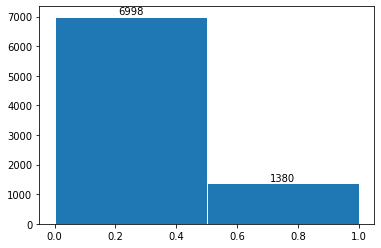

In [15]:
import numpy as np

freq, bins, _ = plt.hist(Y, edgecolor='white', bins=2)

bin_centers = np.diff(bins)*0.5 + bins[:-1] # računanje centra korpice

for fr, x in zip(freq, bin_centers):
    height = int(fr)
    plt.annotate("{}".format(height),
               xy = (x, height),             # poziciranje broja iznad korpice
               xytext = (0,0.2),             # odvajanje teksta od korpice
               textcoords = "offset points", 
               ha = 'center', va = 'bottom'
               )

plt.show()



Primecujemo da je broj instanci prve klase znatno veci od broja instanci druge klase, sto znaci da je stablo prilicno nebalansirano.

Sada podatke delimo na TRENING i TEST skup. 75% ce biti podaci za trening, dok su 25% podaci za testiranje. Stratify koristimo da se ne bi desilo da u trening skupu imamo samo instance koje pripadaju jednoj klasi, vec da imamo instance iz obe klase

In [16]:
X.drop('field',axis=1,inplace = True)

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state=12)


In [18]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(6283, 120)
(6283,)
(2095, 120)
(2095,)


In [19]:
print(Y_train.unique())
print(Y_train.unique())

[0 1]
[0 1]


# Stabla odlucivanja

Pomocne fukcije za vizuelizaciju stabla.Kod je preuzet iz materijala sa vezbi:

In [20]:
def report(model, x, y, text = "training"):
    y_pred = model.predict(x)
    
    print(colored("Izvestaj o klasifikaciji za model{} nad {} podacima".format(type(model).__name__, text), "green"))
    print("---------------------------------------------------------------------------------")
    print(classification_report(y, y_pred))
    print("---------------------------------------------------------------------------------")
    
    print(colored("Matrica konfuzije za model {} nad {} podacima ".format(type(model).__name__, text), "green"))
    print("---------------------------------------------------------------------------------")
    print(pd.DataFrame(confusion_matrix(y, y_pred), columns=['1', '0'], index=['1', '0']))
    print("---------------------------------------------------------------------------------")
    

def plot_decision_tree(model, feature_names):
    plt.figure(figsize=(7, 7))
    plot_tree(model, class_names=['1', '0'], feature_names=feature_names, filled=True)
    plt.title("Stablo odlucivanja dubine{} sa {} cvorova".format(model.get_depth(), model.get_n_leaves()))
    plt.show()
    print("---------------------------------------------------------------------------------")
    print(colored("Parametri modela {}".format(type(model).__name__), "green"))
    for k, v in model.get_params().items():
        print(colored(k, 'blue'), v)
    
    print("---------------------------------------------------------------------------------")


Moramo da nekako konverujemo sve atribute koji nisu brojevi.

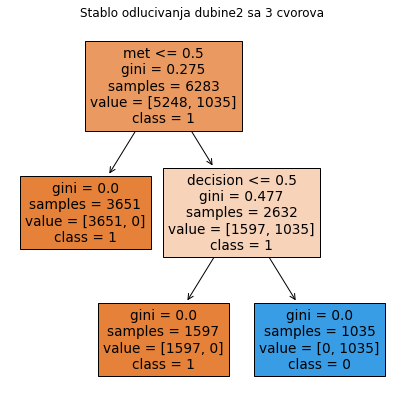

---------------------------------------------------------------------------------
Parametri modela DecisionTreeClassifier
ccp_alpha 0.0
class_weight None
criterion gini
max_depth None
max_features None
max_leaf_nodes None
min_impurity_decrease 0.0
min_samples_leaf 1
min_samples_split 2
min_weight_fraction_leaf 0.0
random_state None
splitter best
---------------------------------------------------------------------------------


In [22]:
dt = DecisionTreeClassifier()

dt.fit(X_train, Y_train)
plot_decision_tree(dt, feature_names)

Proveravamo koliko koji atribut utice na formiranje stabla odlucivanja

In [23]:

print(dt.feature_importances_)




[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

Zakljucujemo da se za klasifikaciju koriste samo 2 artibuta.

Proveravamo kako se model ponasa na TRENING skupu

In [167]:
report(dtc, X_train, Y_train)

Izvestaj o klasifikaciji za modelDecisionTreeClassifier nad training podacima
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5248
           1       1.00      1.00      1.00      1035

    accuracy                           1.00      6283
   macro avg       1.00      1.00      1.00      6283
weighted avg       1.00      1.00      1.00      6283

---------------------------------------------------------------------------------
Matrica konfuzije za model DecisionTreeClassifier nad training podacima 
---------------------------------------------------------------------------------
      1     0
1  5248     0
0     0  1035
---------------------------------------------------------------------------------


Vidimo da je tacnost na trening skupu jedan.Sada proveravamo kako se model ponasa na test skupu.

In [28]:
report(dt, X_test, Y_test,"TEST")

Izvestaj o klasifikaciji za modelDecisionTreeClassifier nad TEST podacima
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1750
           1       1.00      1.00      1.00       345

    accuracy                           1.00      2095
   macro avg       1.00      1.00      1.00      2095
weighted avg       1.00      1.00      1.00      2095

---------------------------------------------------------------------------------
Matrica konfuzije za model DecisionTreeClassifier nad TEST podacima 
---------------------------------------------------------------------------------
      1    0
1  1750    0
0     0  345
---------------------------------------------------------------------------------


Tacnost na test skupu je takodje jednaka jedan.

Model ima tacnost jedan na test skupu, ali probacemo i da podesimo hiper paramentre, da vidimo koji su optimalni parametri 

In [29]:

from sklearn.model_selection import GridSearchCV

params = {'criterion': ['gini', 'entropy'],
          'max_depth': [2,4,6, 8]
         }
estimator = GridSearchCV(DecisionTreeClassifier(), param_grid=params, cv=3) 
estimator.fit(X_train, Y_train)


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8]})

In [26]:


estimator.best_params_



{'criterion': 'gini', 'max_depth': 2}

In [30]:
estimator.best_score_

1.0

Vidimo da nam GridSearch daje iste rezultate kao sto ima nase prvo stablo, isti kriterijum i maksimalnu dubinu.